In [1]:
suppressPackageStartupMessages({

    library(VariantAnnotation)
    library(tidyverse)
    library(glue)
    library(magrittr)
    library(here)
    library(bdkn)
    library(rtracklayer)

})

In [2]:
source(here("src/utils.R"))

In [ ]:
snp_props <- function(gt, remove = NA) {
    if ("Chimp" %in% colnames(gt)) gt <- select(-Chimp)

    snp_props <- gt %>%
        mutate(snp = REF %+% "-" %+% ALT) %>%
        filter(!snp %in% remove) %>%
        select(-(chrom:ALT), -reference) %>%
        group_by(snp) %>%
        summarise_all(~mean(., na.rm = TRUE)) %>%
        gather(ind, proportion, -snp)
    ind_order <- group_by(snp_props, ind) %>%
        summarise(avg_prop = mean(proportion)) %>%
        arrange(avg_prop)
    
    snp_props %>%
        mutate(snp = fct_relevel(snp, c("C-T", "G-A")),
               ind = factor(ind, levels = ind_order$ind)) %>%
        return
}

In [ ]:
exome_gt <- read_gt(here("data/vcf/merged_exome.vcf.gz")) %>% select(-a00_1, -a00_2)
lippold_gt <- read_gt(here("data/vcf/merged_lippold.vcf.gz")) %>% select(-a00_1, -a00_2)
full_gt <- read_gt(here("data/vcf/merged_full.vcf.gz")) %>% select(-a00_1, -a00_2, -mez2, -spy1)
tv_full_gt <- read_gt(here("data/vcf/merged_full_tv.vcf.gz")) %>% select(-a00_1, -a00_2, -mez2, -spy1)

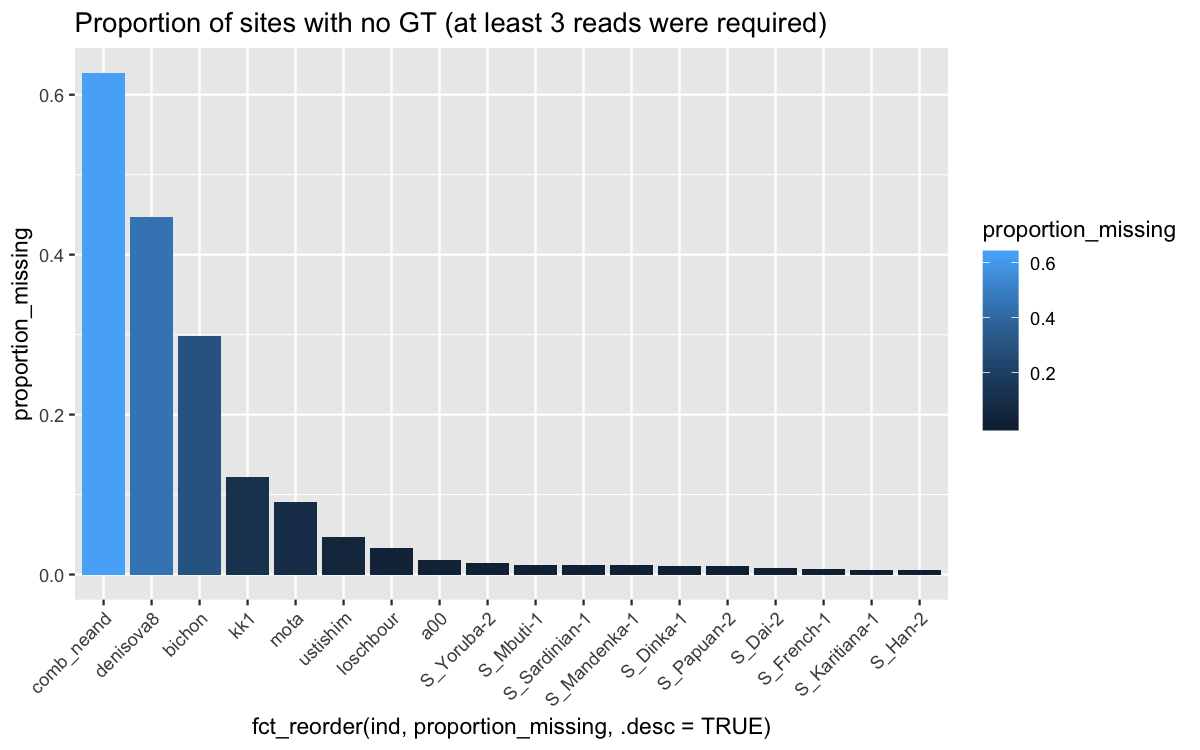

In [47]:
set_dim(8, 5)

select(full_gt, -c(chrom, pos, REF, ALT, Chimp, reference)) %>%
summarise_all(list(~ mean(is.na(.), na.rm = TRUE))) %>%
gather(ind, proportion_missing) %>%
ggplot(aes(fct_reorder(ind, proportion_missing, .desc = TRUE), proportion_missing, fill = proportion_missing)) +
    geom_bar(stat = "identity") +
    theme(axis.text.x = element_text(hjust = 1, angle = 45)) +
    ggtitle("Proportion of sites with no GT (at least 3 reads were required)")

In [21]:
exome_props <- snp_props(exome_gt)
lippold_props <- snp_props(lippold_gt)
full_props <- snp_props(full_gt)
tv_full_props <- snp_props(tv_full_gt)

Warning message:
“Unknown levels in `f`: C-T, G-A”

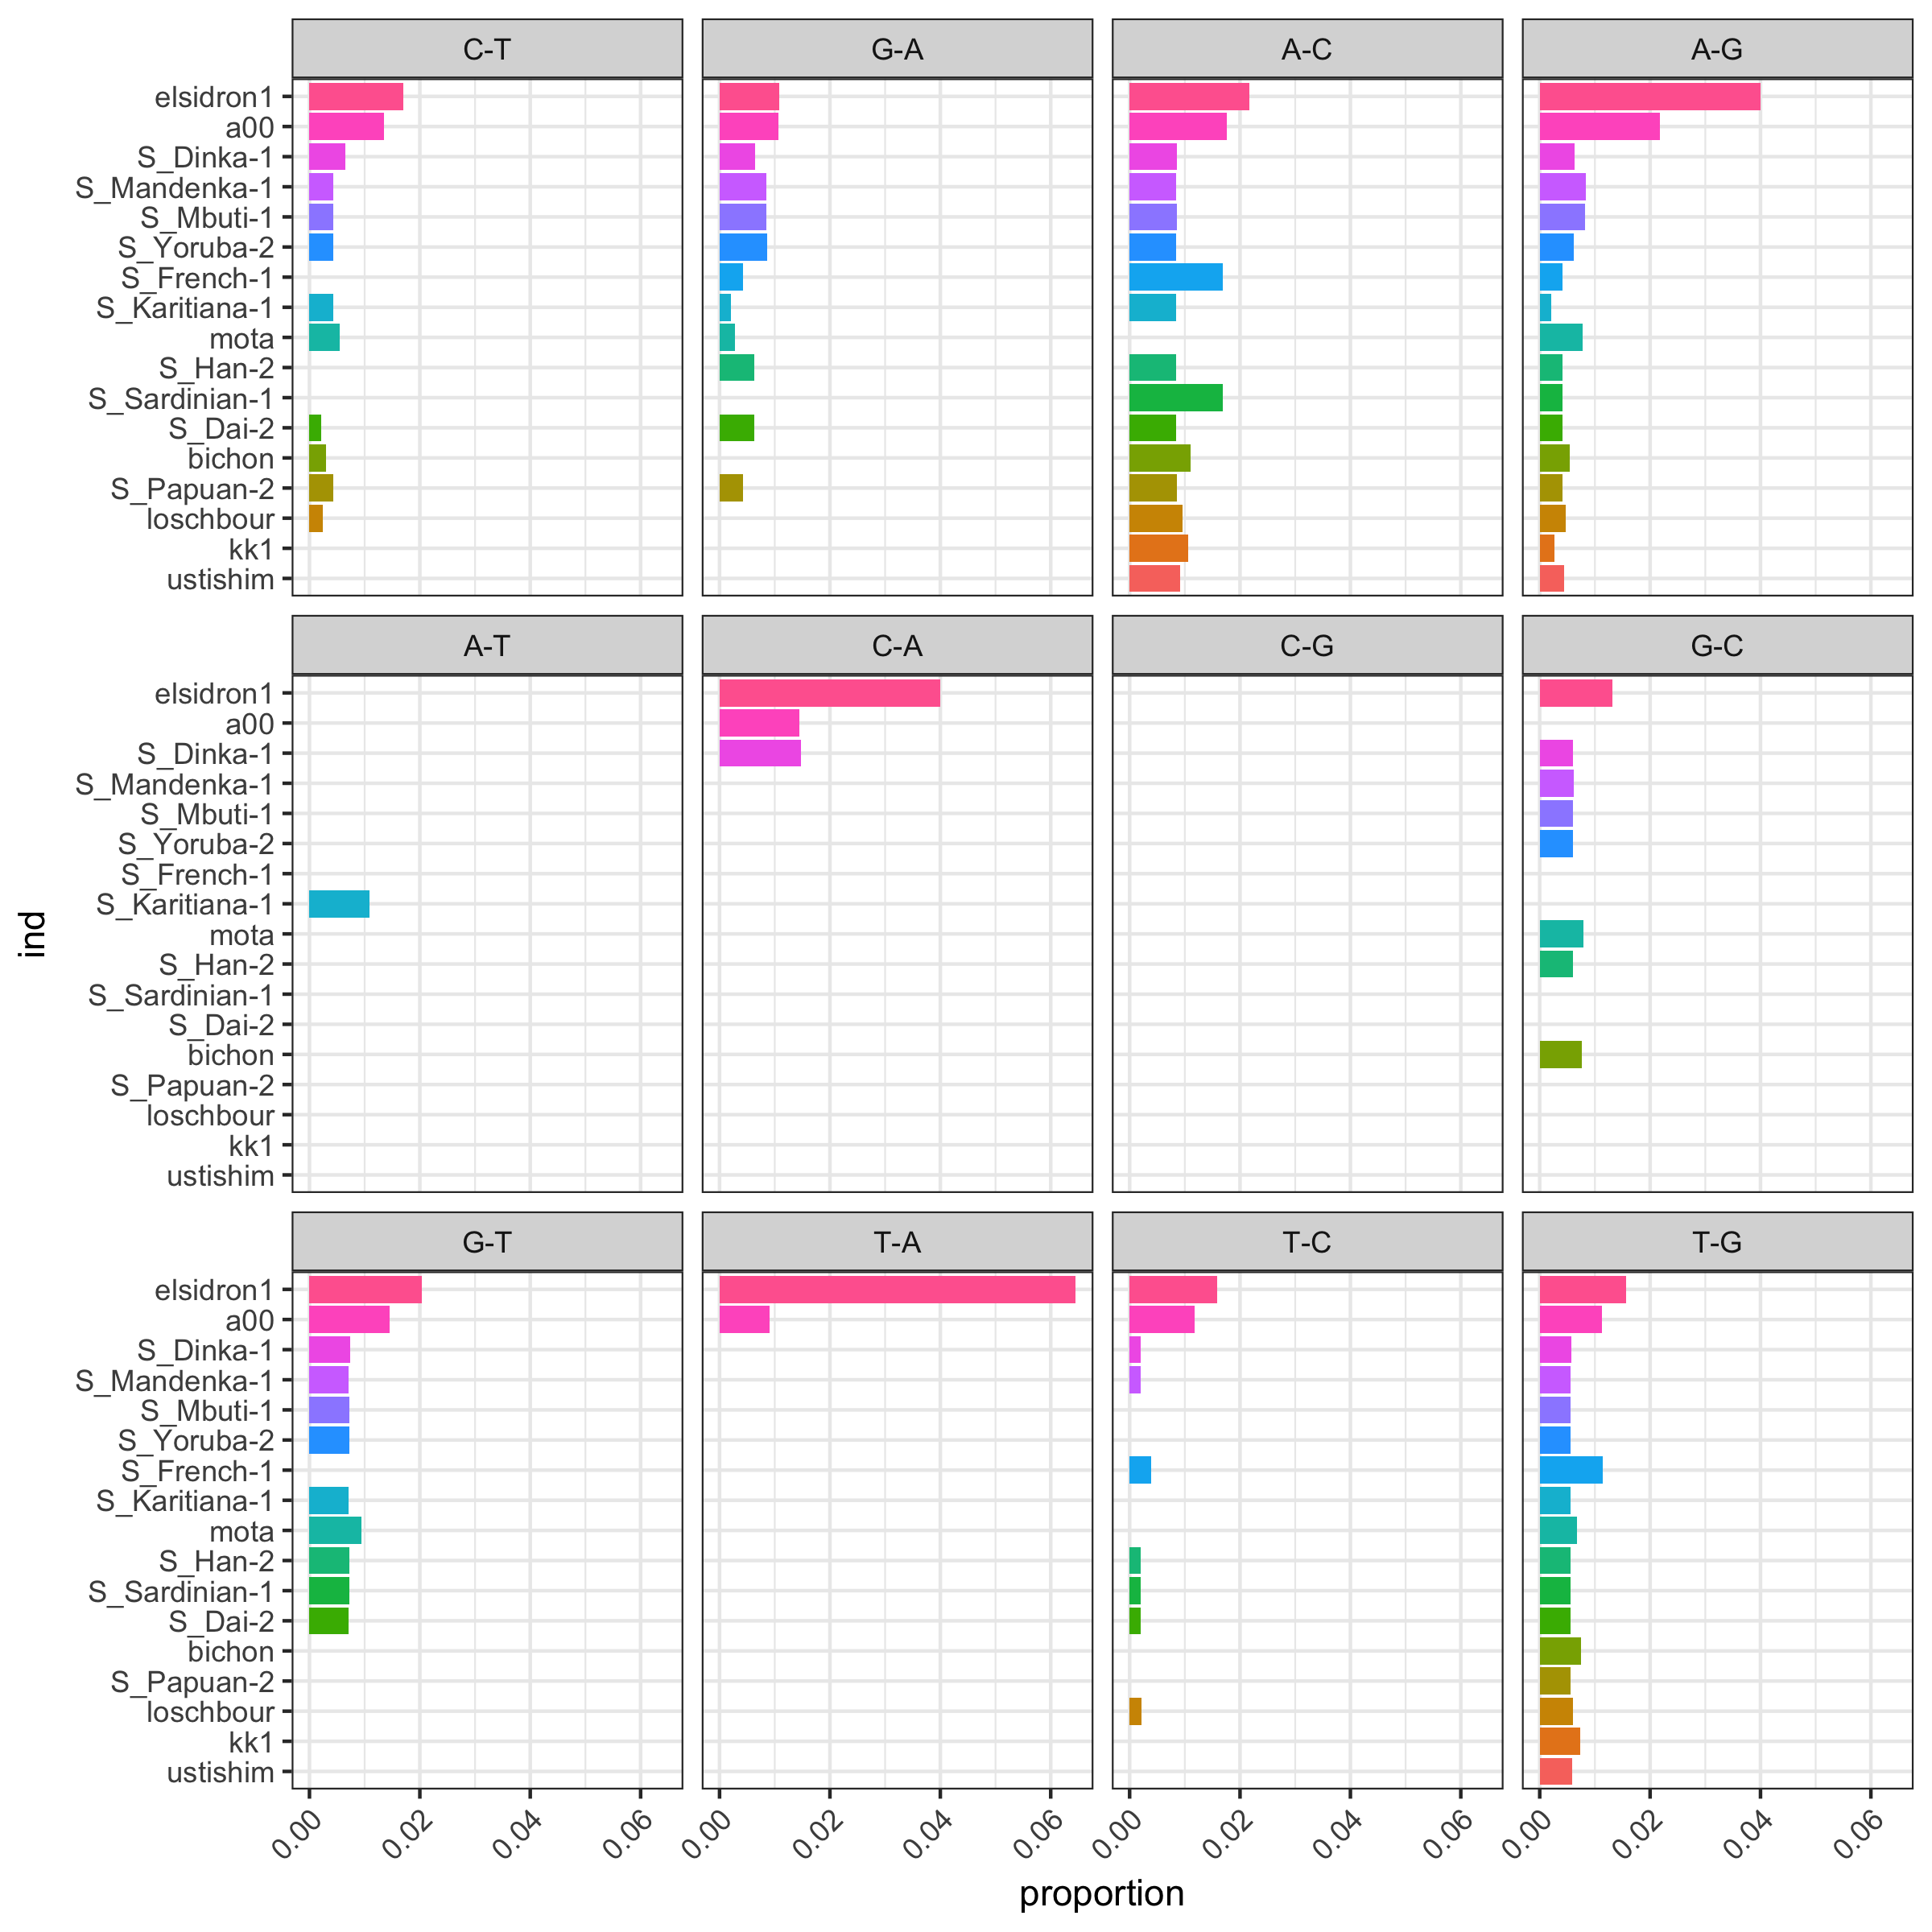

In [22]:
set_dim(8, 8, 300)

exome_props %>%
ggplot(aes(ind, proportion, fill = ind)) + geom_bar(stat = "identity") + facet_wrap(~ snp) +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45))

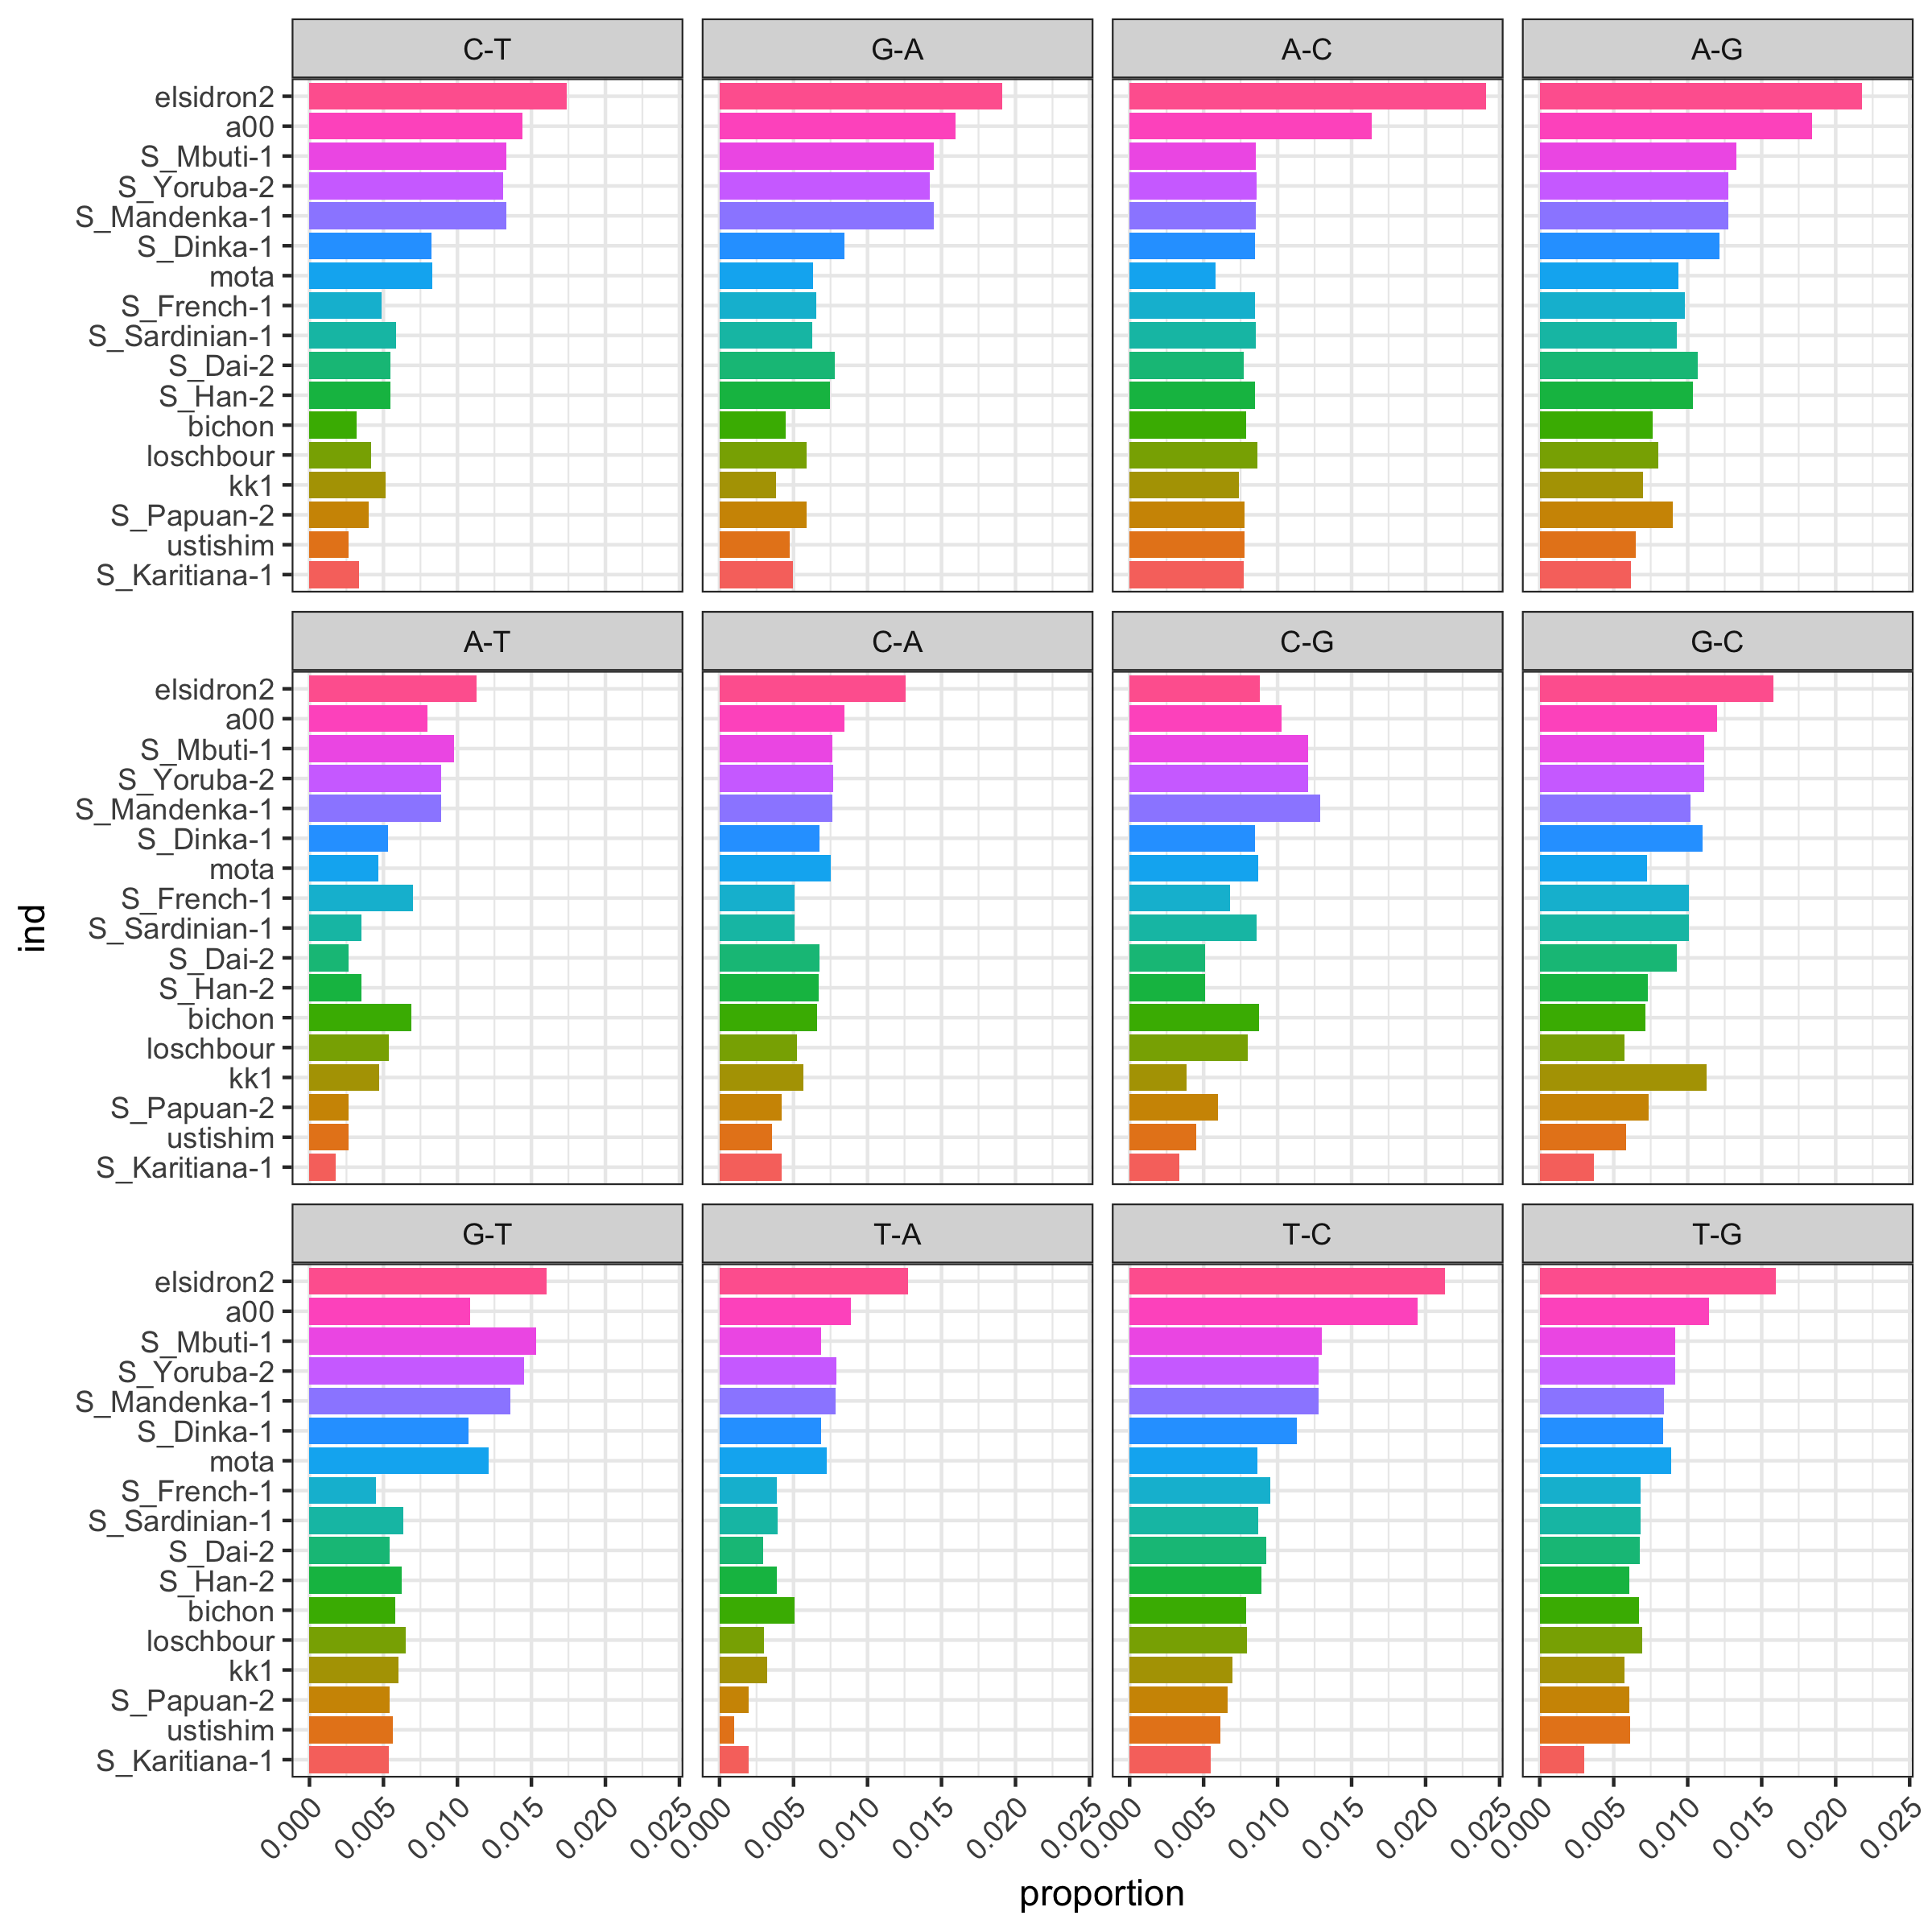

In [23]:
set_dim(8, 8, 300)

lippold_props %>% 
ggplot(aes(ind, proportion, fill = ind)) + geom_bar(stat = "identity") + facet_wrap(~ snp) +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45))

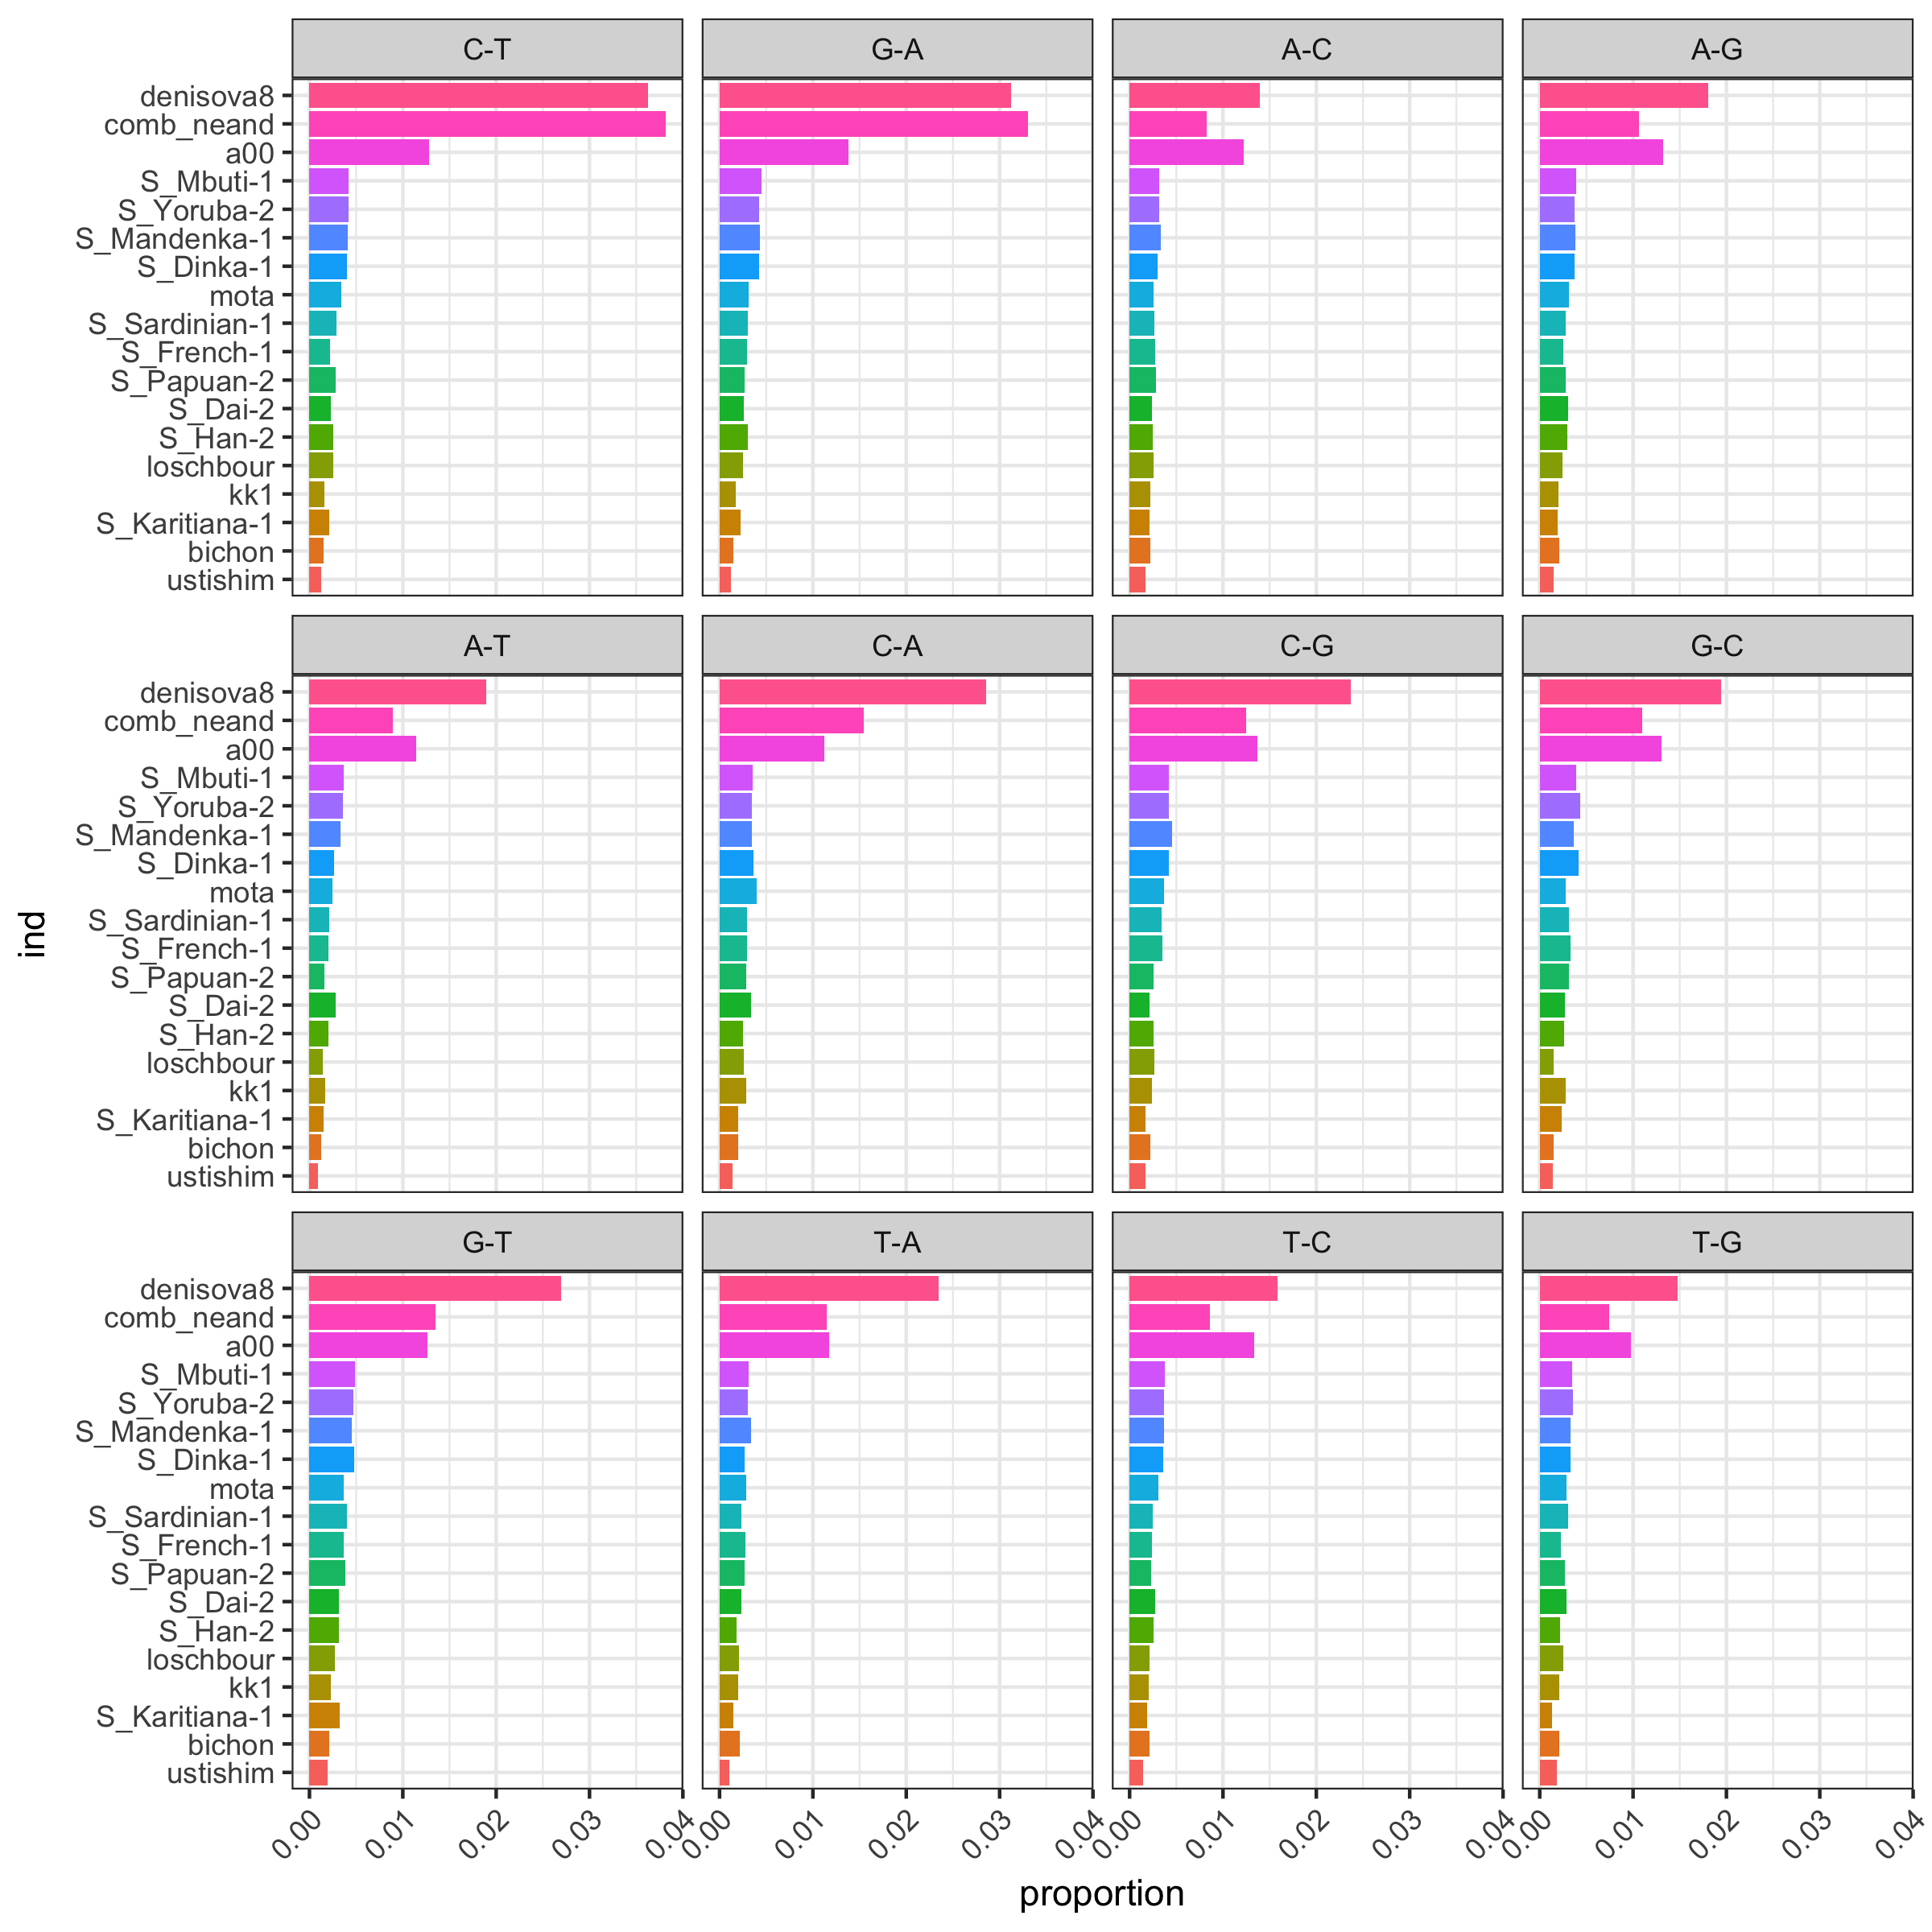

In [24]:
set_dim(8, 8, 300)

full_props %>%
ggplot(aes(ind, proportion, fill = ind)) + geom_bar(stat = "identity") + facet_wrap(~ snp) +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45))

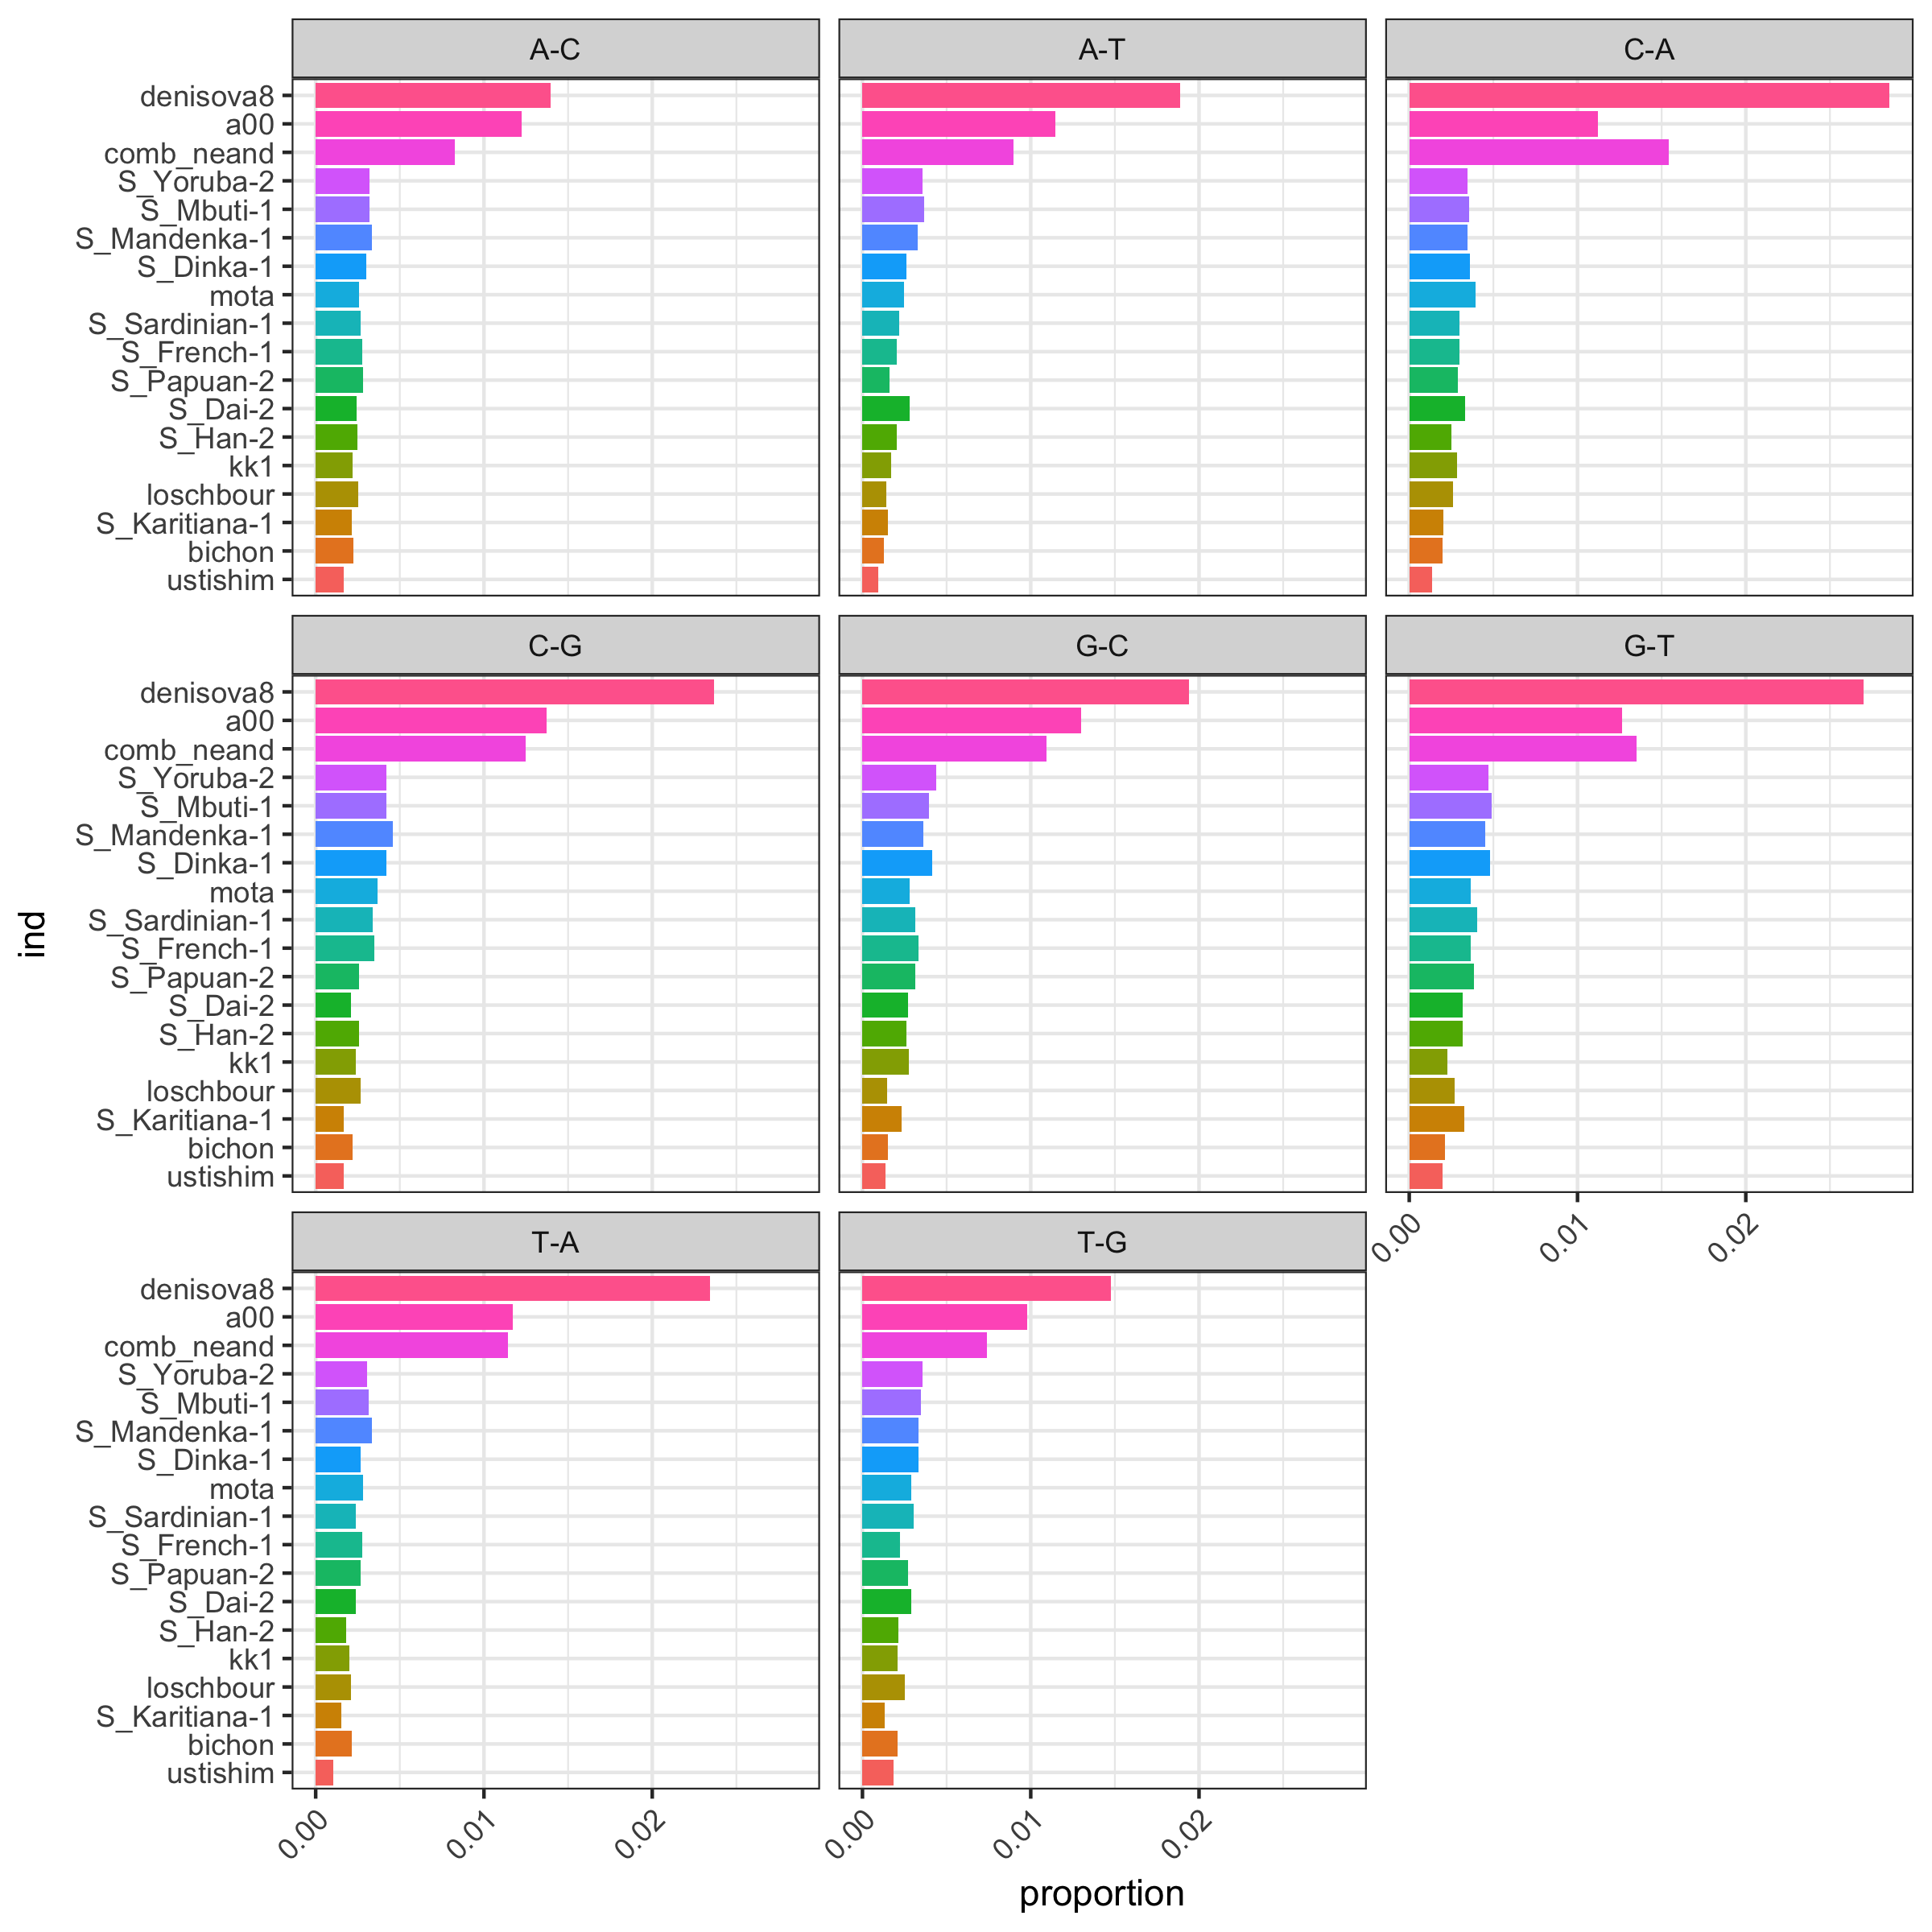

In [25]:
set_dim(8, 8, 300)

tv_full_props %>%
ggplot(aes(ind, proportion, fill = ind)) + geom_bar(stat = "identity") + facet_wrap(~ snp) +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45))

In [101]:
props <- tv_full_props %>% spread(ind, proportion)
props

snp,ustishim,bichon,S_Karitiana-1,loschbour,kk1,S_Han-2,S_Dai-2,S_Papuan-2,S_French-1,S_Sardinian-1,mota,S_Dinka-1,S_Mandenka-1,S_Mbuti-1,S_Yoruba-2,comb_neand,a00,denisova8
A-C,0.0016810961,0.002250918,0.002160007,0.002526741,0.002217090,0.002492937,0.002415660,0.002838537,0.002747710,0.002672903,0.002578236,0.003008273,0.003338062,0.003177258,0.003184180,0.008285004,0.012229063,0.01396834
A-T,0.0009472388,0.001250695,0.001495607,0.001419648,0.001685275,0.002058576,0.002812148,0.001593401,0.002060311,0.002159016,0.002489296,0.002629849,0.003291330,0.003671279,0.003582540,0.008966494,0.011470282,0.01890061
C-A,0.0013797181,0.001969538,0.002037414,0.002593411,0.002862292,0.002497918,0.003337660,0.002883185,0.002969838,0.002980348,0.003941091,0.003624872,0.003439301,0.003535870,0.003453103,0.015417331,0.011196119,0.02854512
C-G,0.0016915107,0.002194185,0.001684836,0.002677652,0.002393981,0.002582183,0.002091425,0.002588352,0.003472911,0.003393552,0.003676061,0.004184517,0.004587156,0.004193291,0.004213060,0.012474616,0.013724704,0.02366152
G-C,0.0013866667,0.001530115,0.002315980,0.001465662,0.002756086,0.002614379,0.002724521,0.003137969,0.003320922,0.003140194,0.002826456,0.004141414,0.003640409,0.003949367,0.004364596,0.010949985,0.013005487,0.01940359
G-T,0.0019866892,0.002101116,0.003269195,0.002704791,0.002262200,0.003169572,0.003180543,0.003843270,0.003651002,0.004045916,0.003644694,0.004785138,0.004504505,0.004877134,0.004707211,0.013506213,0.012655837,0.02698679
T-A,0.0010585065,0.002135839,0.001517019,0.002120073,0.002016985,0.001802657,0.002376652,0.002666413,0.002753513,0.002382541,0.002838605,0.002672011,0.003340970,0.003150358,0.003062787,0.011443876,0.011735283,0.02344628
T-G,0.0018304351,0.002094972,0.001318500,0.002500625,0.002108158,0.002144153,0.002891845,0.002729754,0.002226253,0.003062914,0.002902885,0.003313453,0.003316475,0.003482587,0.003573803,0.007400000,0.009784245,0.01474333


In [102]:
ct_ratio <- apply(props[, -1], 1, function(row) { row / (props[props$snp == "A-C", -1] %>% as.matrix %>% as.vector) }) %>%
t %>%
as.data.frame %>% mutate(snp = props$snp) %>% 
gather(ind, ratio, -snp)

In [107]:
ind_order <- ct_ratio %>%
group_by(ind) %>%
summarise(avg_ratio = mean(ratio)) %>%
arrange(avg_ratio)

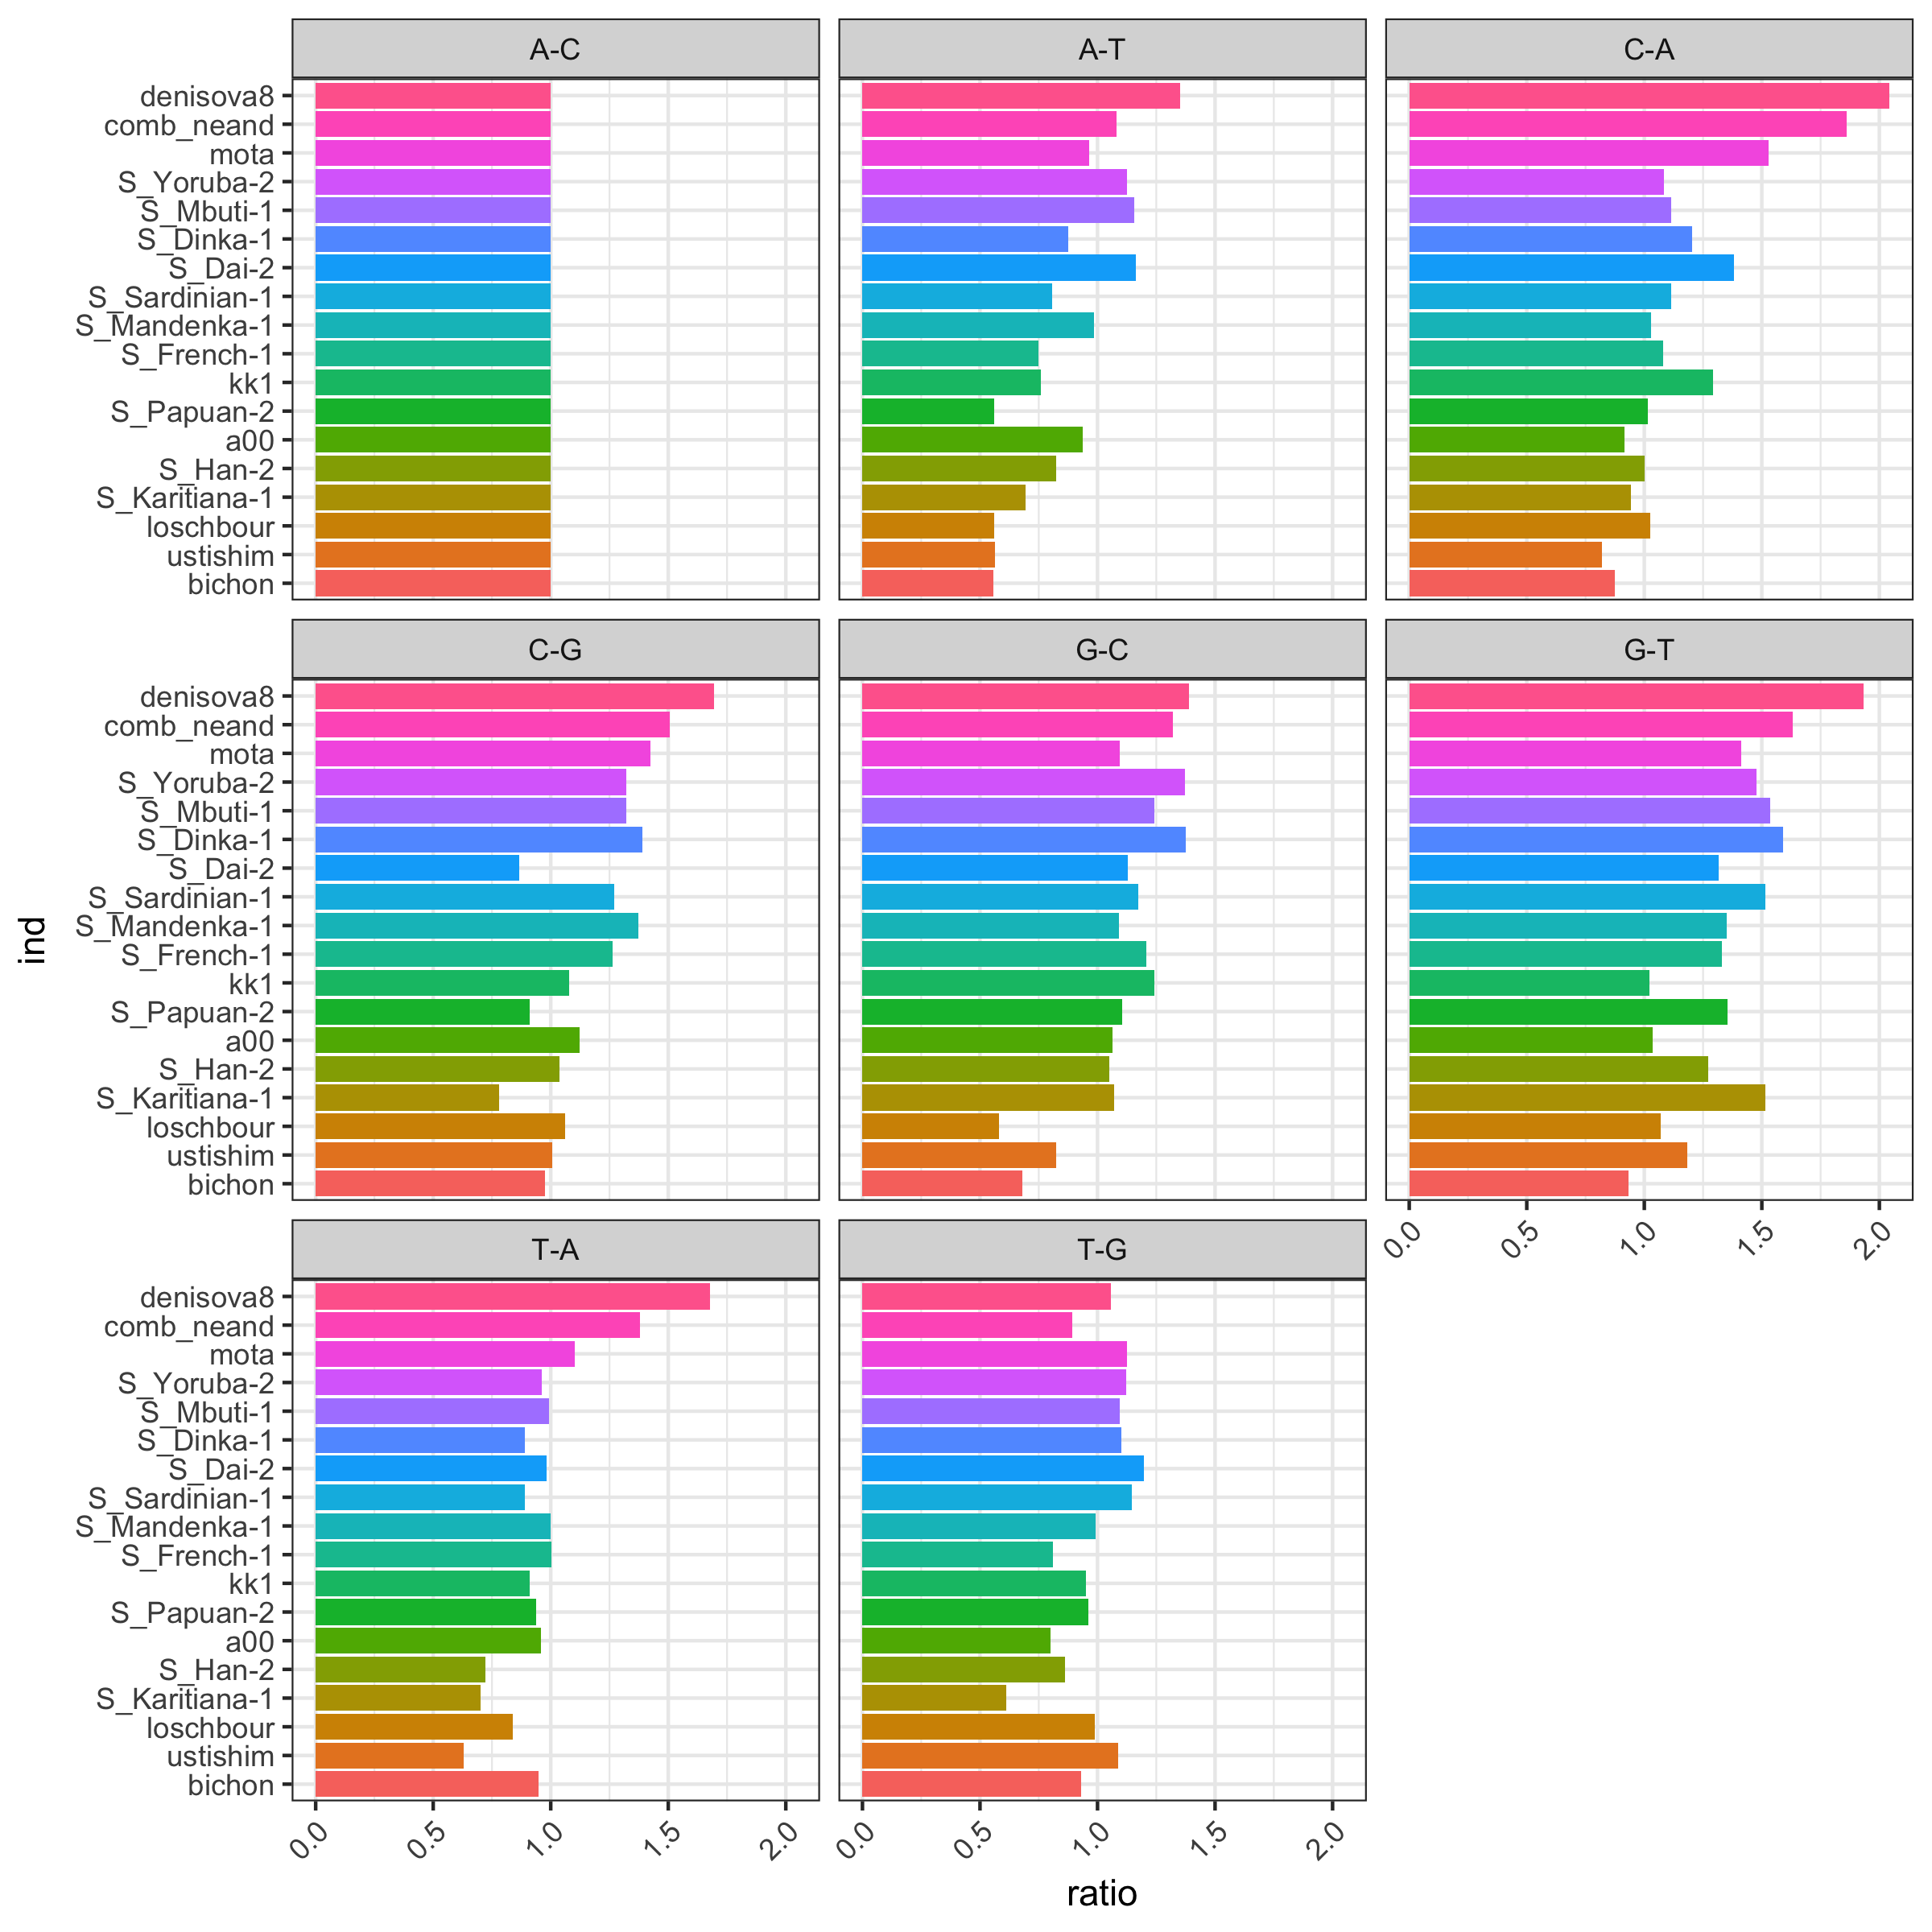

In [110]:
set_dim(8, 8, 300)

ct_ratio %>%
mutate(ind = factor(ind, levels = ind_order$ind)) %>%
ggplot(aes(ind, ratio, fill = ind)) + geom_bar(stat = "identity") + facet_wrap(~ snp) +
    coord_flip() +
    theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(hjust = 1, angle = 45))

In [3]:
snp_props <- function(gt, remove = NA) {
    if ("Chimp" %in% colnames(gt)) gt <- select(-Chimp)

    snp_counts <- gt %>%
        mutate(snp = REF %+% "-" %+% ALT) %>%
        filter(!snp %in% remove) %>%
        select(-(chrom:ALT), -reference) %>%
        group_by(snp) %>%
        summarise_all(~sum(., na.rm = TRUE))

    total_sites <-
        gt %>%
        select(-(chrom:ALT), -reference) %>%
        summarise_all(~ sum(!is.na(.)))


    snp_props <-
        snp_counts[, -1] %>%
        colnames %>%
        map(~ snp_counts[[.x]] / total_sites[[.x]]) %>%
        setNames(colnames(snp_counts[, -1])) %>%
        as_tibble %>%
        add_column(snp = snp_counts$snp, .before = 1)

    snp_props
}

In [5]:
test_cov <- read_gt(here("data/vcf/test_cov.vcf.gz"))

In [6]:
test_props <- snp_props(test_cov)

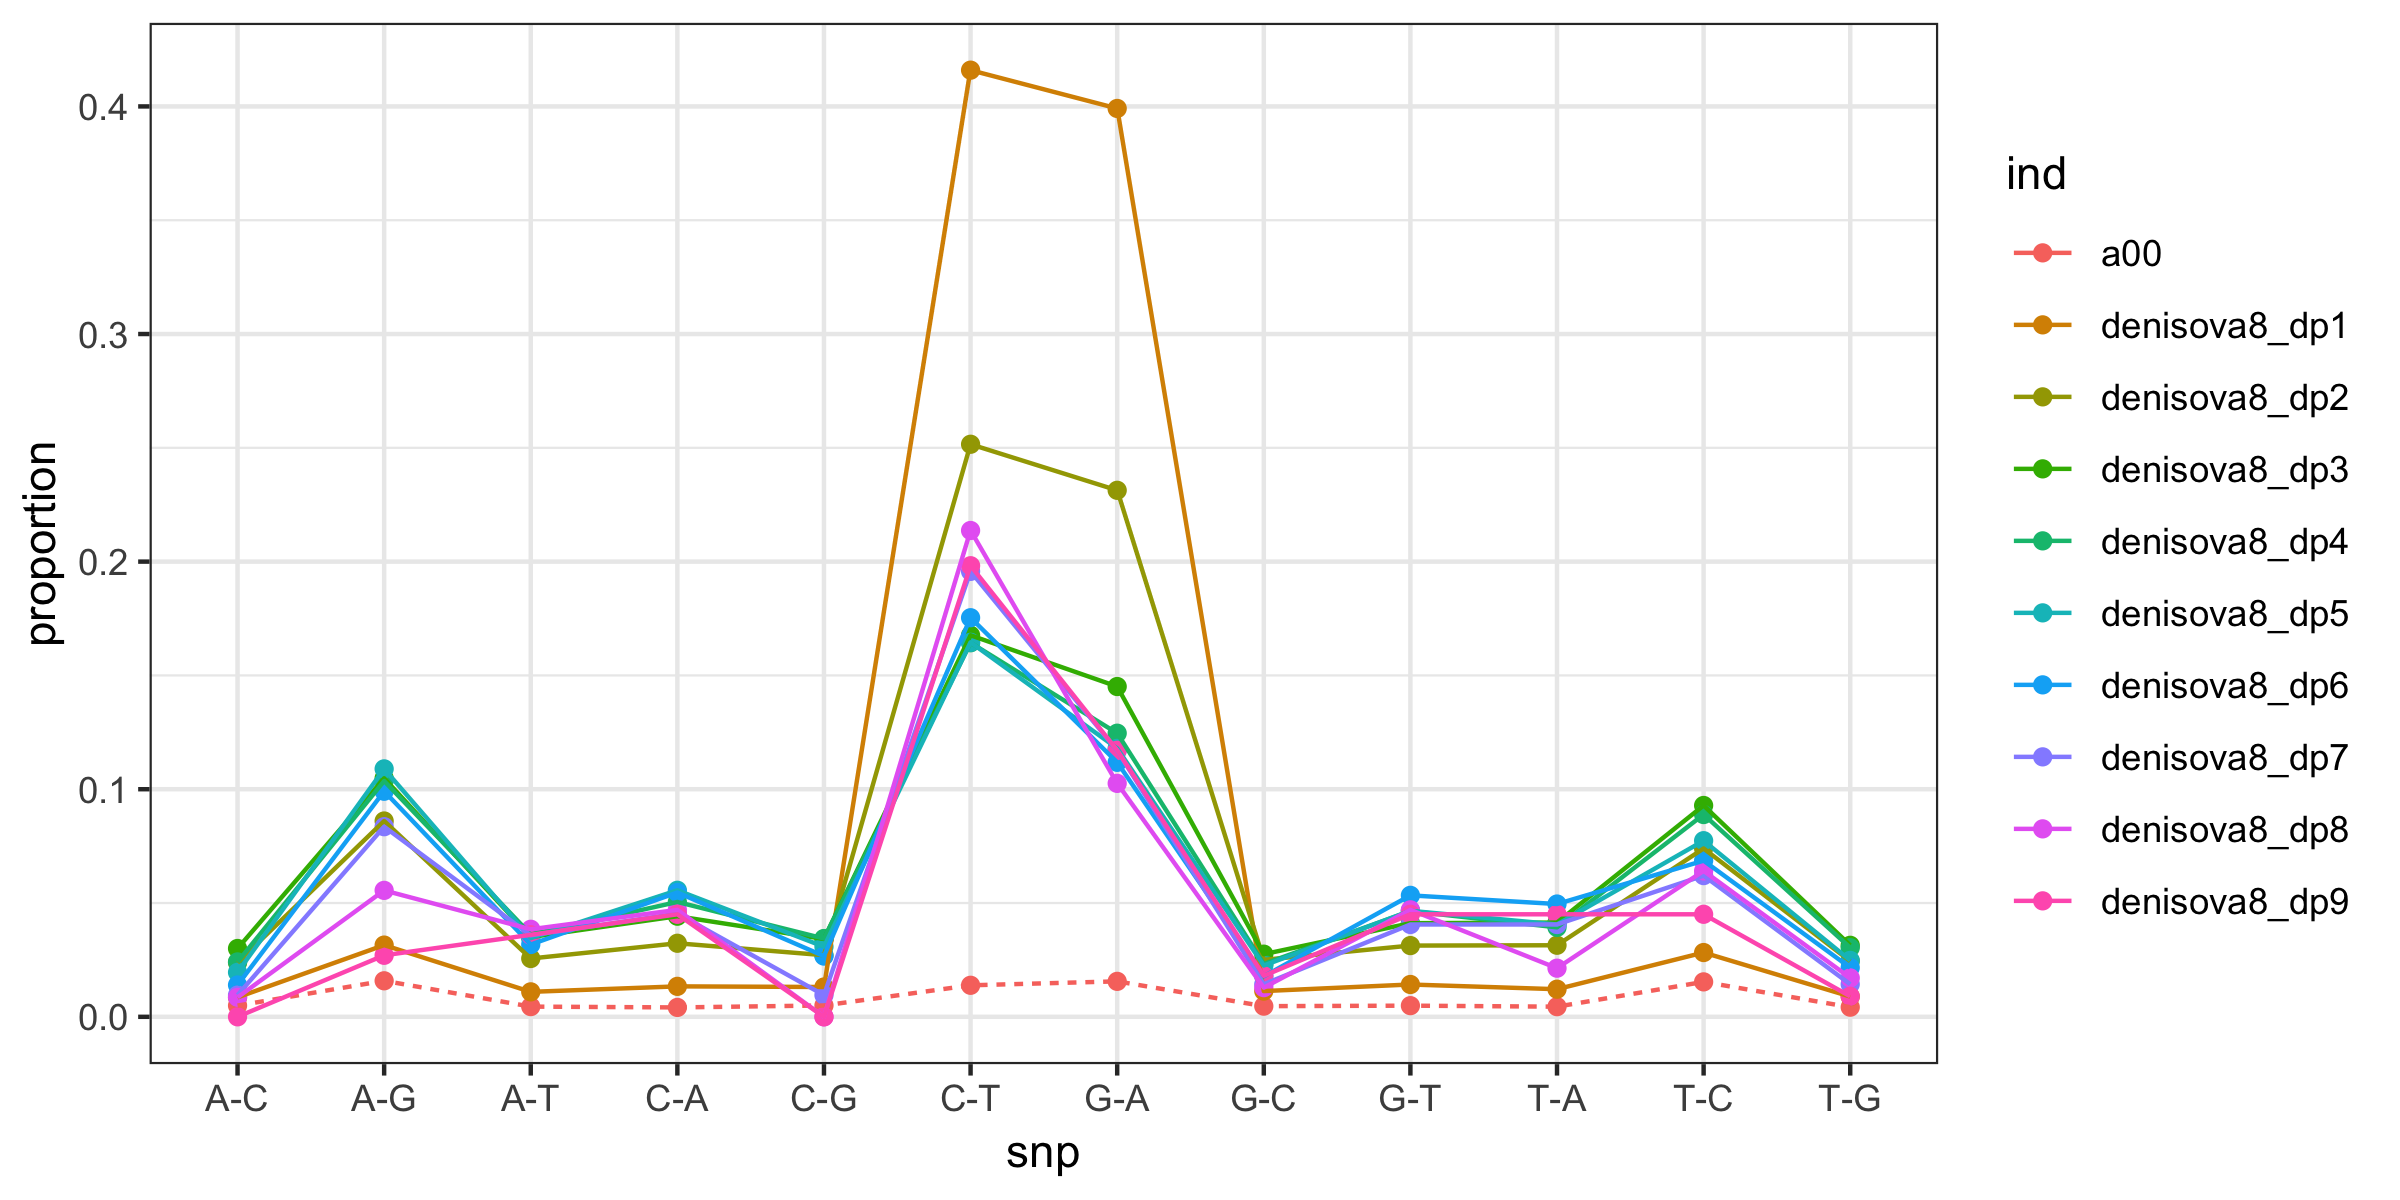

In [7]:
set_dim(8, 4, 300)

test_props %>%
gather(ind, proportion, -snp) %>%
ggplot(aes(snp, proportion, color = ind)) + geom_point() +
    geom_line(aes(group = ind, linetype = ind == "a00")) +
    theme_bw() +
    guides(linetype = FALSE)